# **Logistic Regression Model**

In [1]:
#Import Libraries
import numpy as nm   
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn library is used for plotting the graphs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Forming Dataframe
data = pd.read_csv("/Users/arnav/Desktop/Arnav Code/Introduction to Intelligent Systems/2021519_Assignment3/Q3_diabetes_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Pre-Processing

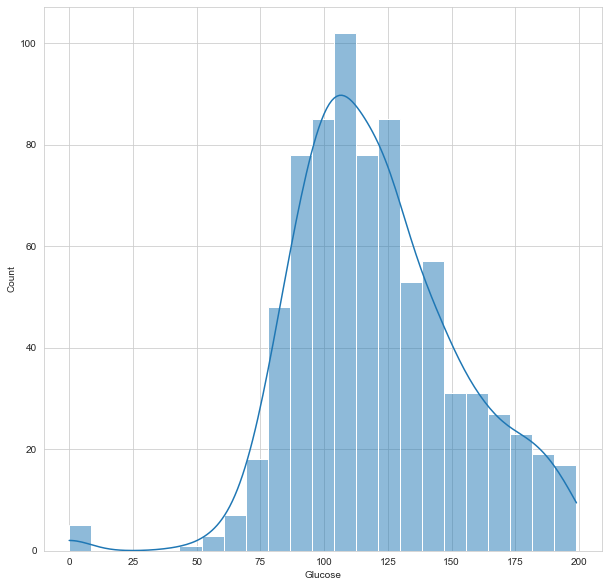

In [2]:
#Histogram with a Kernel Density Estimate to smoothen the Histogram
#Glucose Levels
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.histplot(data.Glucose, kde = True)
plt.show()

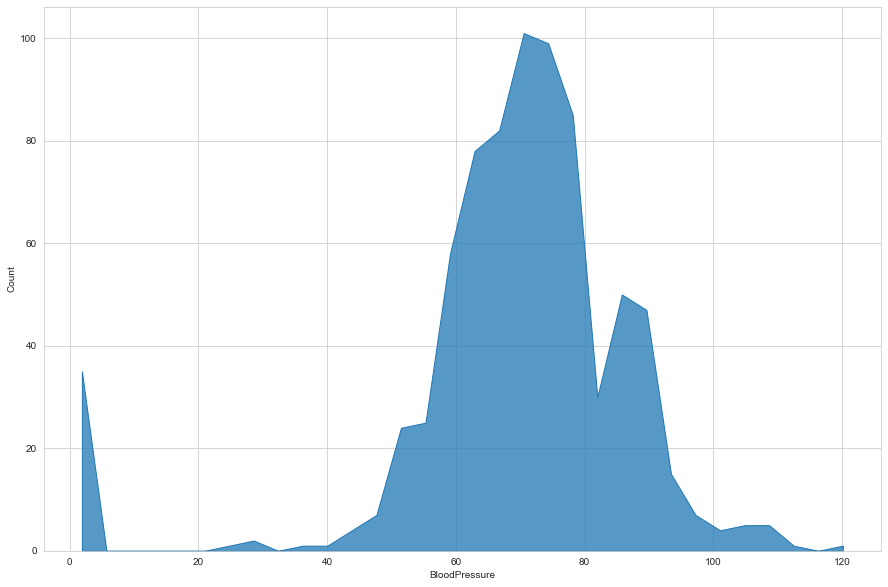

In [3]:
#Frequency Polygon to analyse Blood Pressure Data
plt.figure(figsize=(15, 10))
sns.histplot(data.BloodPressure, element = "poly")
plt.show()

<Figure size 1080x1080 with 0 Axes>

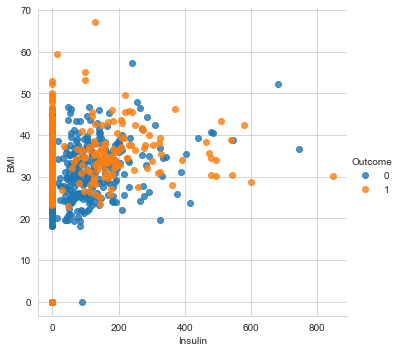

In [4]:
#Insulin vs BMI - Their comparison with outcome
plt.figure(figsize=(15, 15))
sns.lmplot(x = 'Insulin', y = 'BMI', data = data, hue = 'Outcome', fit_reg = False)
plt.show()

<Figure size 1080x1080 with 0 Axes>

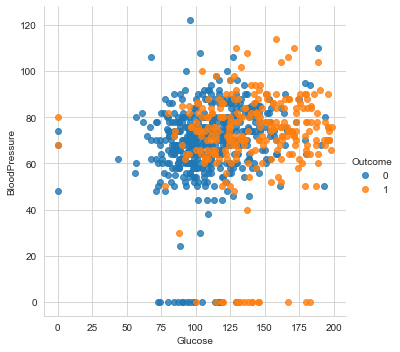

In [5]:
#BP vs Glucose levels - Their comparison with outcome
plt.figure(figsize=(15, 15))
sns.lmplot(x = 'Glucose', y = 'BloodPressure', data = data, hue = 'Outcome', fit_reg = False)
plt.show()

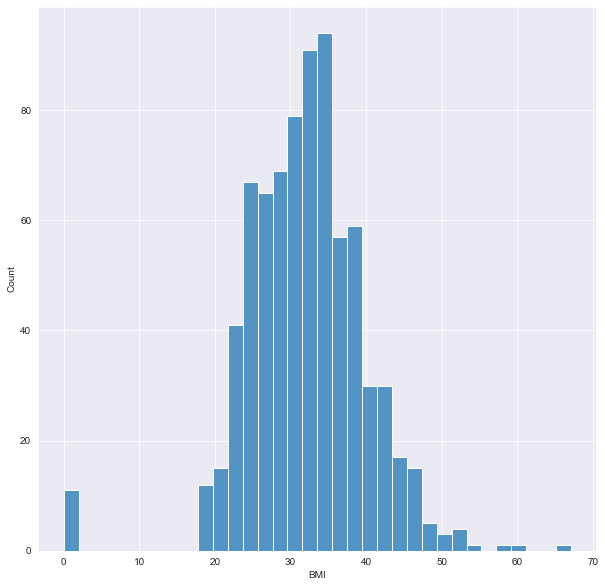

In [6]:
#BMI Levels
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10))
sns.histplot(data.BMI)
plt.show()

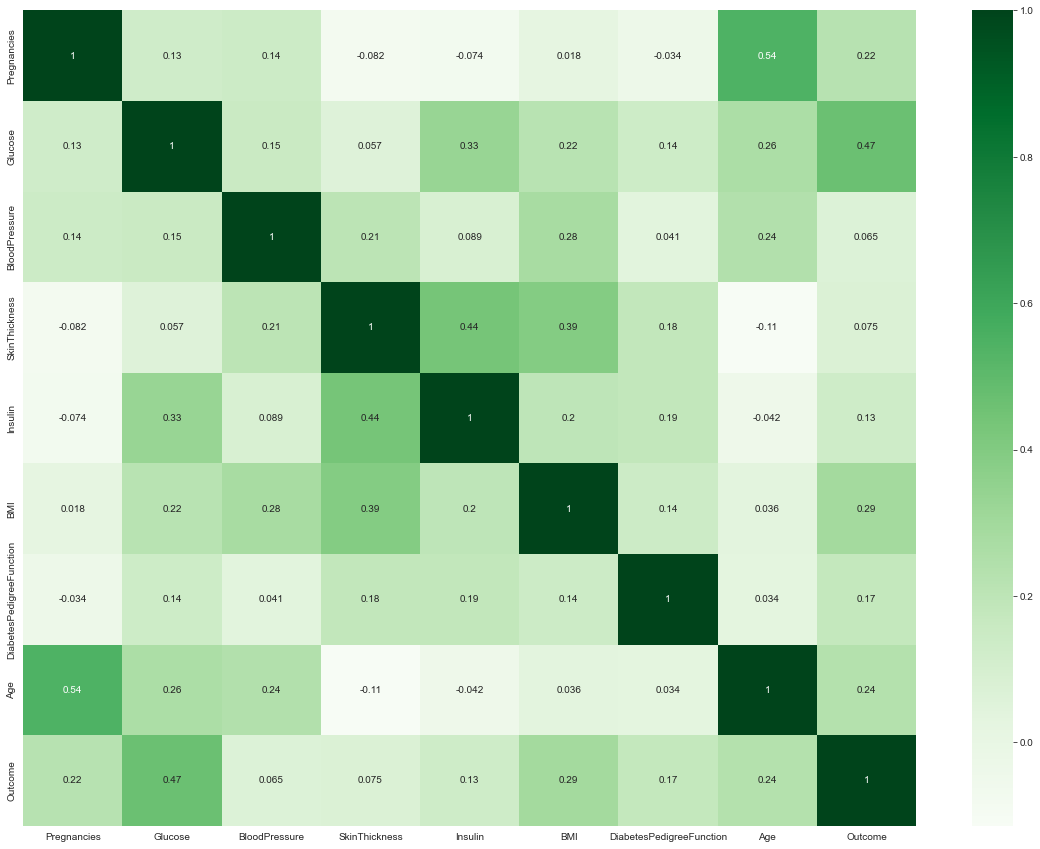

In [7]:
#Heatmap to analyse Correlations between the data
plt.figure(figsize = (20,15))
correlations = data.corr()
sns.heatmap(correlations, cmap = "Greens", annot = True)
plt.show()

In [8]:
#Splitting the Dataset into a 7:3 ratio for training and testing respectively
training_data, testing_data = train_test_split(data, test_size = 0.3)
x_train, y_train = training_data.iloc[:, :-1], training_data["Outcome"]
x_test, y_test = testing_data.iloc[:, :-1], testing_data["Outcome"]

### Fitting Logistic Regression Model to the Dataset

In [9]:
fitting = LogisticRegression(random_state = 0).fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predicting from the Model

In [10]:
#Prediction on the Testing Data
predicted_data = fitting.predict(x_test)
predicted_data

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [11]:
#Prediction on the Training Data
training_predicted = fitting.predict(x_train)
training_predicted 

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [12]:
#True Data
true_data = list(y_test.values)
print(true_data)

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]


### Probability Estimates

In [13]:
#Probability Estimates for the Testing Data
fitting.predict_proba(x_test.iloc[:2, :])

array([[0.93309515, 0.06690485],
       [0.35084211, 0.64915789]])

### Testing and Training Accuracy

In [14]:
#Confusion Matrix for Testing Data
arr1 = confusion_matrix(true_data, predicted_data)
confusion_matrix(true_data, predicted_data)

array([[139,   8],
       [ 39,  45]])

In [15]:
#Confusion Matrix for Training Data
arr2 = confusion_matrix(list(y_train.values), training_predicted)
arr2

array([[317,  36],
       [ 80, 104]])

In [16]:
#Scoring my Model

#Testing-Confusion Matrix Accuracy
count = 0
total = 0
for i in range(len(arr1)):
  for j in range(len(arr1[i])):
    if i == j:
      count += arr1[i][j]
    total += arr1[i][j]
accuracy_model = count/total
accuracy_perc = round(accuracy_model*100,2)

#Training-Confusion Matrix Accuracy
count2 = 0
total2 = 0
for i in range(len(arr2)):
  for j in range(len(arr2[i])):
    if i == j:
      count2 += arr2[i][j]
    total2 += arr2[i][j]
accuracy_model2 = count2/total2
accuracy_perc2 = round(accuracy_model2*100,2)

print(f'Training Accuracy is {accuracy_perc2}%')
print(f'Testing Accuracy is {accuracy_perc}%')

Training Accuracy is 78.4%
Testing Accuracy is 79.65%
